In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [54]:
img1 = cv2.imread("pic5.jpeg",cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("pic4.jpeg",cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'image to be scanned')

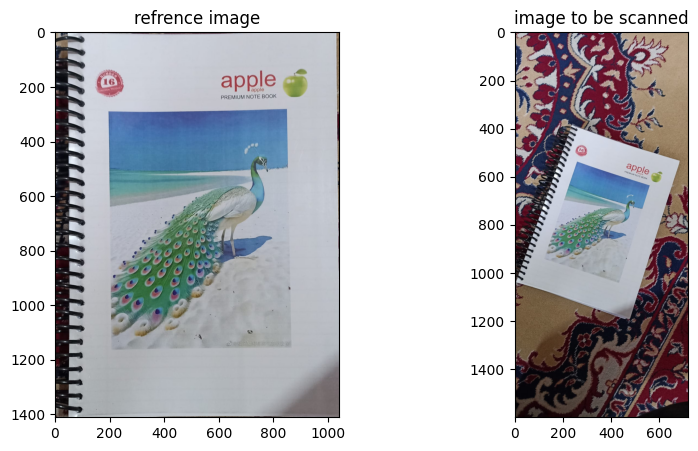

In [55]:
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img1); plt.title("refrence image")
plt.subplot(142); plt.imshow(img2); plt.title("image to be scanned")

In [56]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [57]:
max_features = 500
orb = cv2.ORB_create(max_features)
keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)


#detect
img1_display=cv2.drawKeypoints(img1, keypoints1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img2_display=cv2.drawKeypoints(img2, keypoints2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

Text(0.5, 1.0, 'image to be scanned')

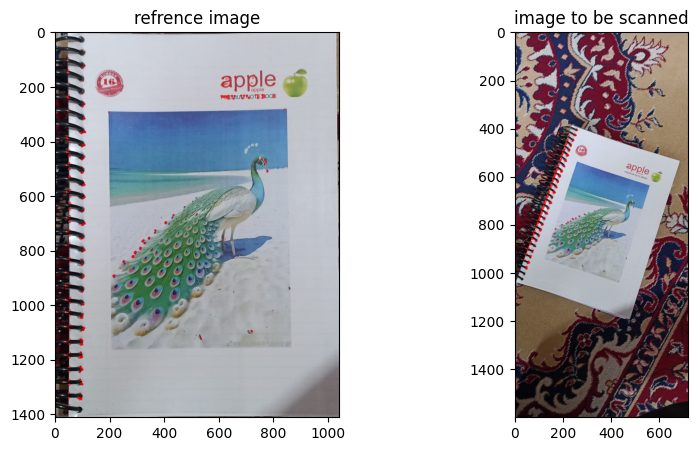

In [58]:
plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img1_display); plt.title("refrence image")
plt.subplot(142); plt.imshow(img2_display); plt.title("image to be scanned")

In [59]:
# Match keypoints in the two images
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Convert matches tuple to a list
matches = list(matches)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


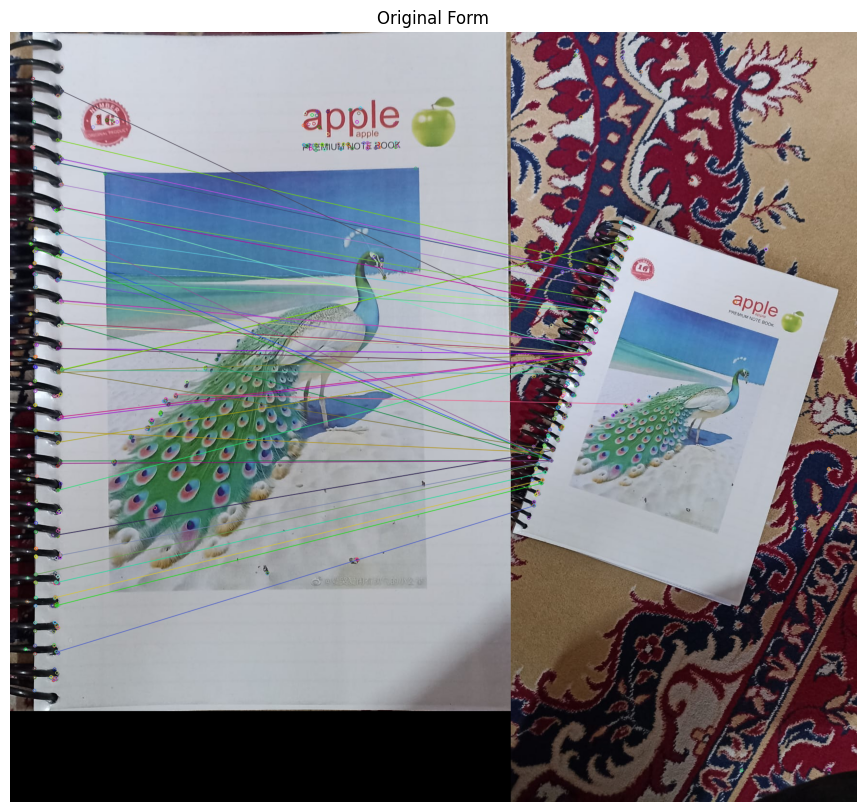

In [60]:
# Draw top matches
im_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");


In [61]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

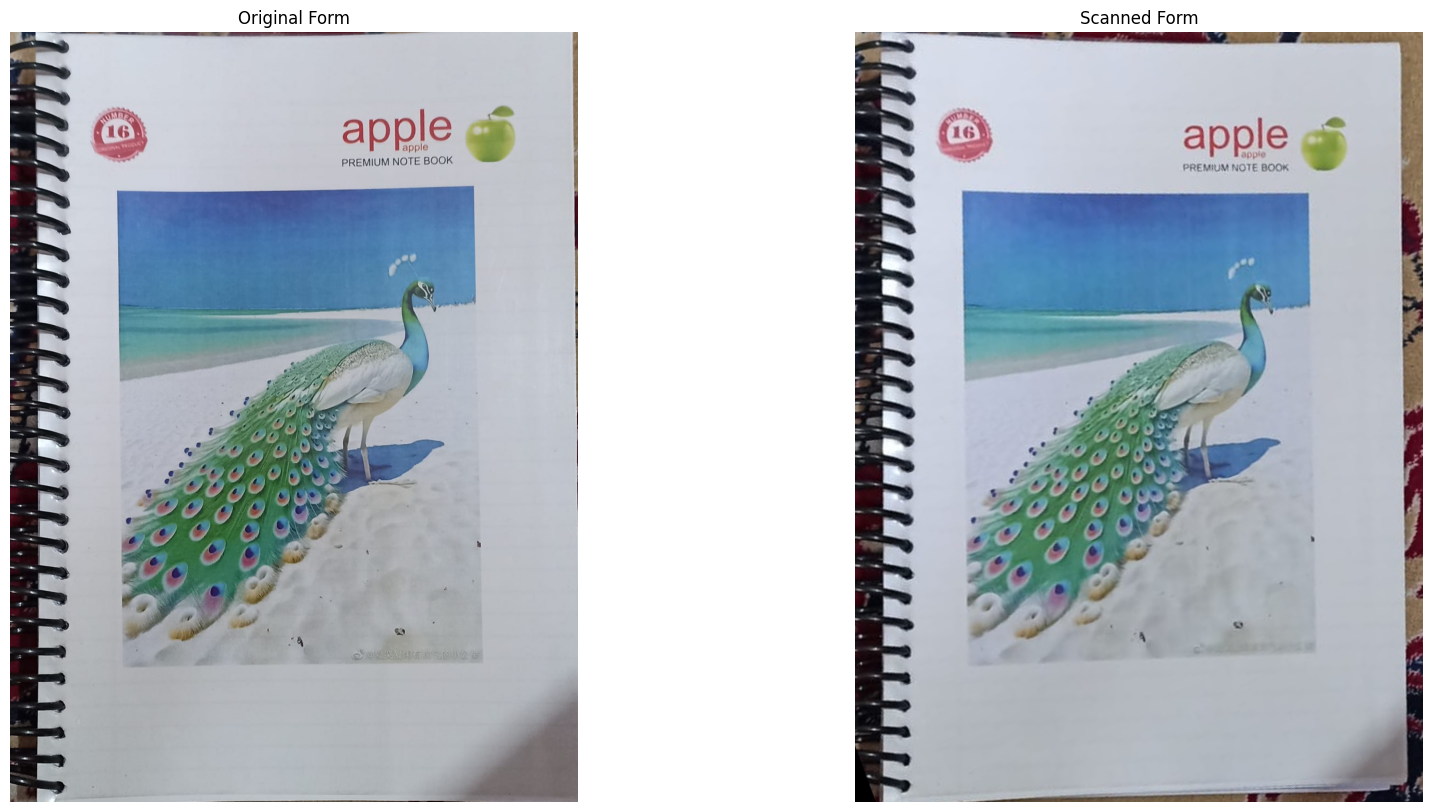

In [62]:
# Use homography to warp image
height, width, channels = img1.shape
img2_reg= cv2.warpPerspective(img2, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(img1); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(img2_reg); plt.axis('off'); plt.title("Scanned Form");